# Import library

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve
from sklearn.model_selection import KFold,RandomizedSearchCV
from sklearn.decomposition import PCA
seed =45
% matplotlib inline
plt.style.use('fivethirtyeight')

# Import data set

In [2]:
#path = '../input/'
path = ''
train = pd.read_csv(path+'train.csv',na_values=-1)
test = pd.read_csv(path+'test.csv',na_values=-1)
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

Number rows and columns: (4209, 378)
Number rows and columns: (4209, 377)


# Explore data set

In [3]:
train.head(5).T

,0,1,2,3,4
ID,0,6,7,9,13
y,130.81,88.53,76.26,80.62,78.02
X0,k,k,az,az,az
X1,v,t,w,t,v
X2,at,av,n,n,n
X3,a,e,c,f,f
X4,d,d,d,d,d
X5,u,y,x,x,h
X6,j,l,j,l,d
X8,o,o,x,e,n


# Target varaiable

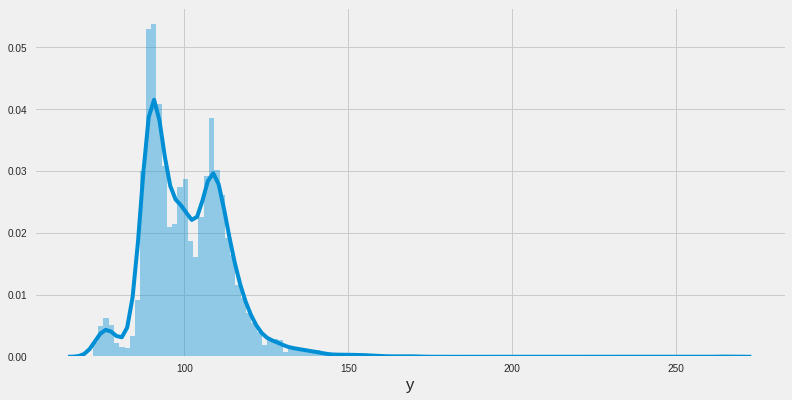

In [4]:
plt.figure(figsize=(12,6))
sns.distplot(train['y'],bins=120)
plt.xlabel('y')

#train['y'].value_counts()

The 'target' variable in imbalanced 

# CORELATION PLOT

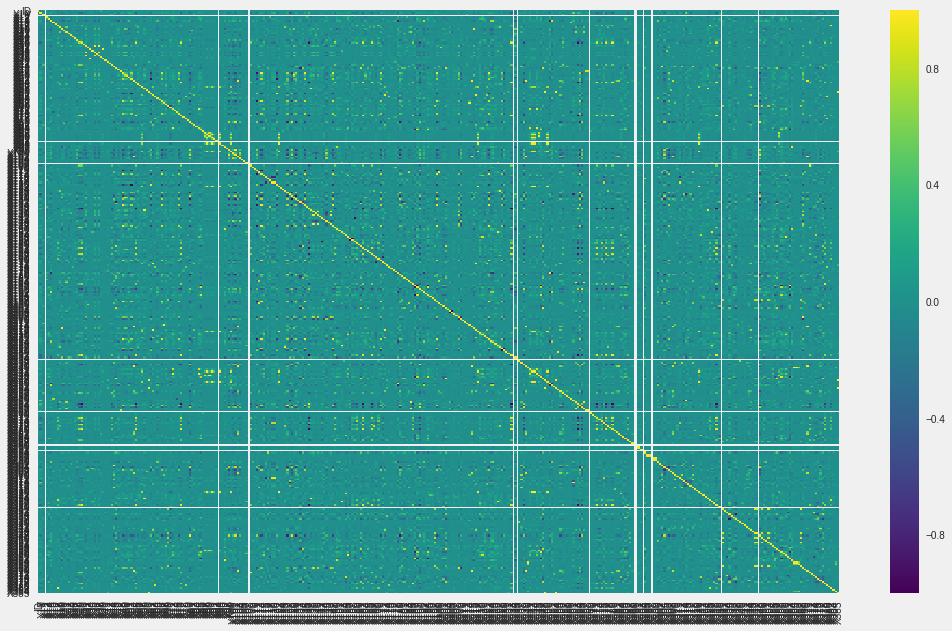

In [5]:
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor,cmap='viridis')

# Missing value is data set

In [6]:
train.isnull().sum().sum()

0

In [7]:
test.isnull().sum().sum()

0

The data set is combined. The binary feature present in data set. Unique value in columns, 368 columns contains binary feature

In [8]:
train_len = train.shape[0]
df = pd.concat([train,test],axis=0)

In [9]:
bin_col = [c for c in df.columns if (df[c].nunique()==2)]
len(bin_col)

368

In [10]:
other_col = [c for c in df.columns if c not in bin_col]
other_col

['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'y']

In [11]:
df[other_col].nunique()

ID    8418
X0      53
X1      27
X2      50
X3       7
X4       4
X5      33
X6      12
X8      25
y     2545
dtype: int64

In [12]:
def category_type(df):
    col = df.columns
    for i in col:
        if (2< df[i].nunique() <=53):
            df[i] = df[i].astype('category')
category_type(df)

# Univariate analysis

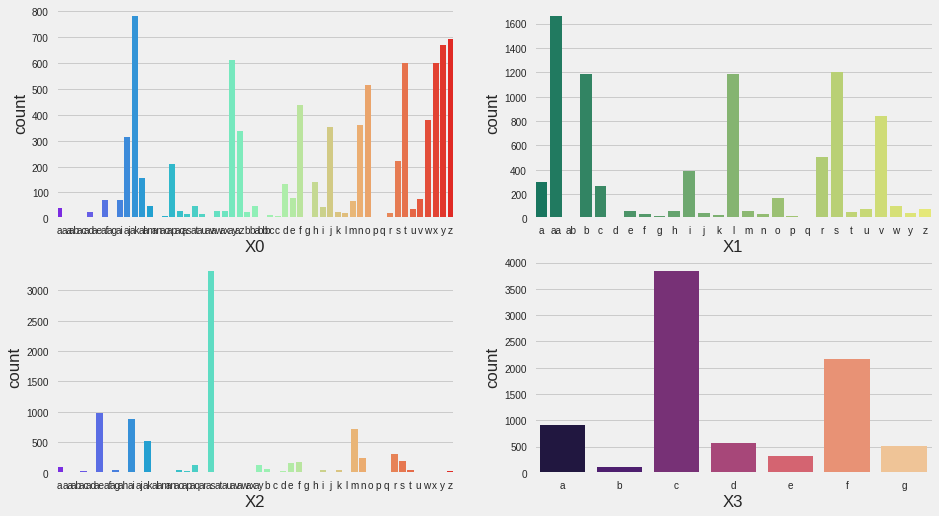

In [13]:
fig ,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df['X0'],palette='rainbow',ax=ax1)
sns.countplot(df['X1'],palette='summer',ax=ax2)
sns.countplot(df['X2'],palette='rainbow',ax=ax3)
sns.countplot(df['X3'],palette='magma',ax=ax4)

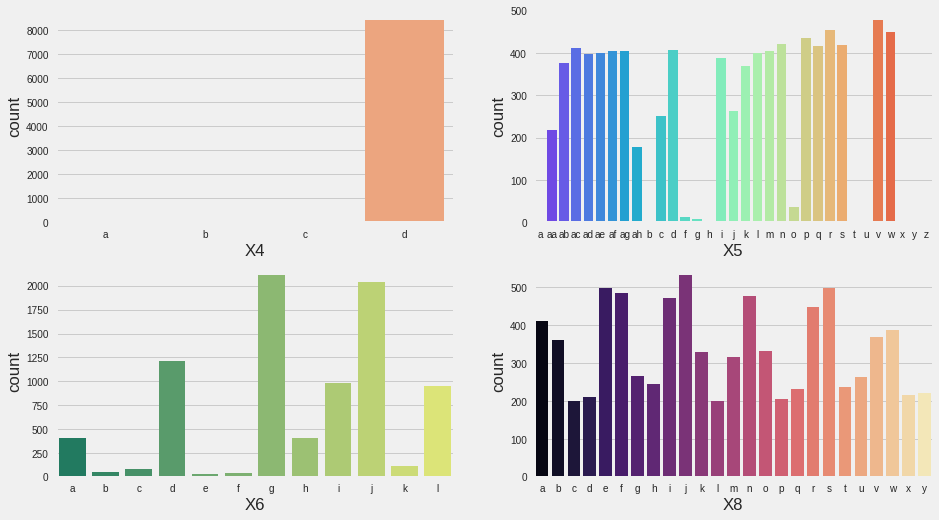

In [14]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df['X4'],palette='magma',ax=ax1)
sns.countplot(df['X5'],palette='rainbow',ax=ax2)
sns.countplot(df['X6'],palette='summer',ax=ax3)
sns.countplot(df['X8'],palette='magma',ax=ax4)

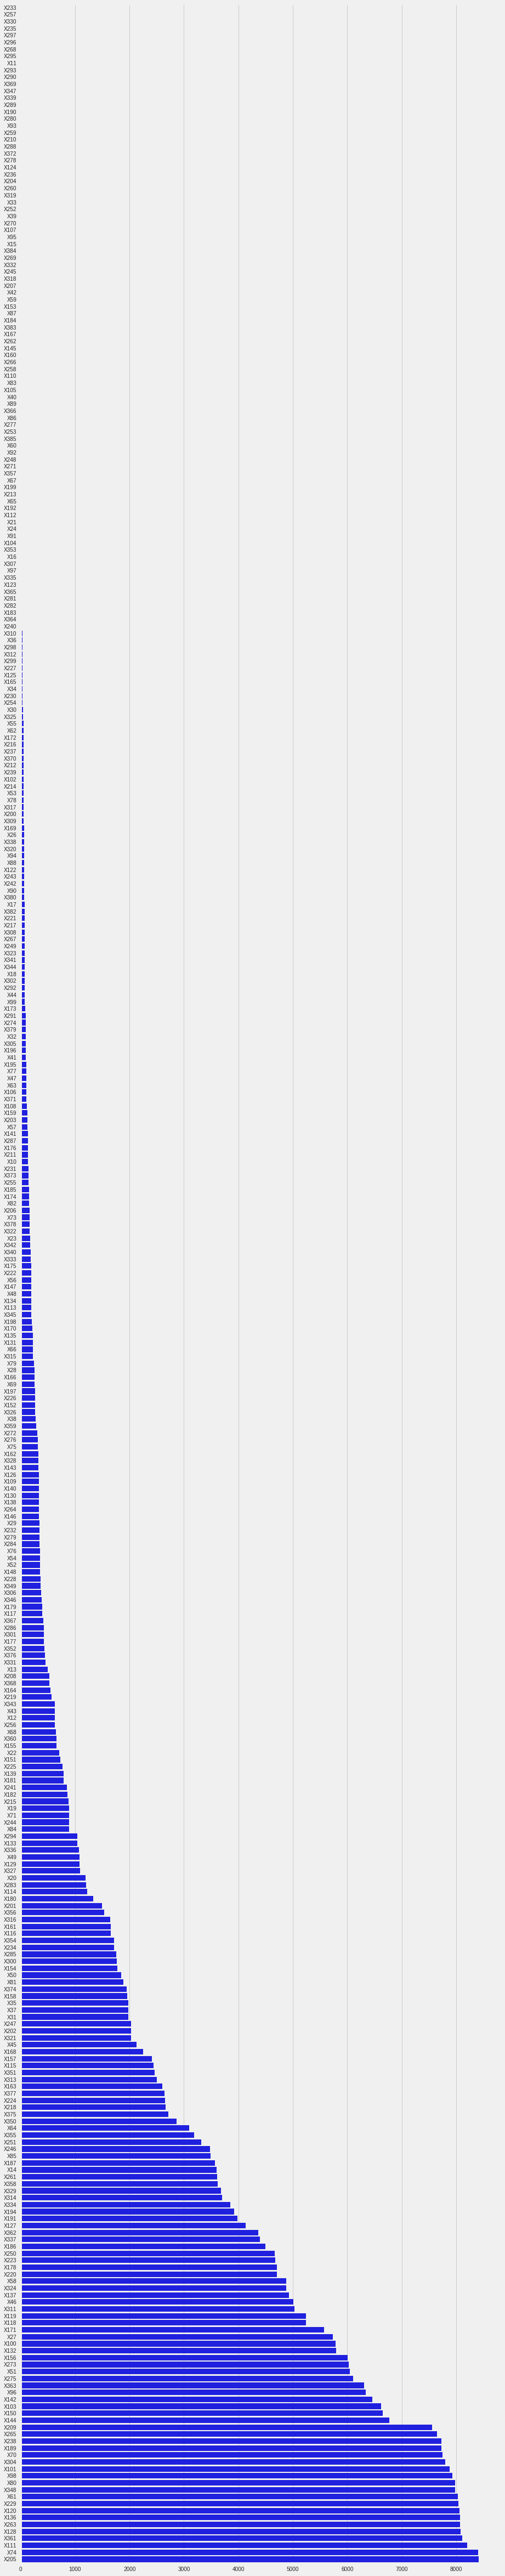

In [15]:
plt.figure(figsize=(14,80))
k = df[bin_col].sum().sort_values()
sns.barplot(k,k.index,orient='h',color='b')

# One Hot Encoding

In [16]:
def OHE(df,columns):
    print('Categorical features',len(columns))
    c2,c3 = [],{}
    for c in columns:
        c2.append(c)
        c3[c] = 'ohe_'+c
    df1 = pd.get_dummies(df,prefix=c3,columns=c2,drop_first=True)
    print('Size',df1.shape)
    return df1

In [17]:
col_ohe = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
df1 = OHE(df,col_ohe)

Categorical features 8
Size (8418, 573)


In [18]:
df1.head()

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,ohe_X8_p,ohe_X8_q,ohe_X8_r,ohe_X8_s,ohe_X8_t,ohe_X8_u,ohe_X8_v,ohe_X8_w,ohe_X8_x,ohe_X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA

In [19]:
pca = PCA(n_components=None,random_state=seed)
pca.fit(df1.drop(['y','ID'],axis=1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=45,
  svd_solver='auto', tol=0.0, whiten=False)

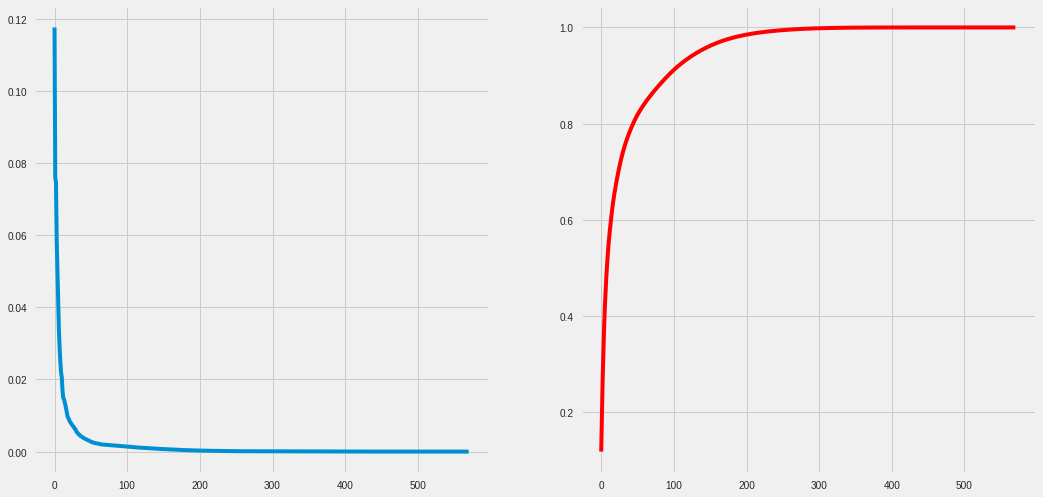

In [20]:
pca_var = pca.explained_variance_ratio_
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2, = ax.flatten()
ax1.plot(pca_var)
pca_var_cum = np.cumsum(pca_var)
ax2.plot(pca_var_cum,color='r')

In [21]:
pca = PCA(n_components=300,random_state=seed)
df_pca = pca.fit_transform(df1.drop(['y','ID'],axis=1))

# Split data set

In [22]:
X = df_pca[:train_len,]
y = df1[:train_len]['y']
x_test = df_pca[train_len:,]
X.shape,y.shape,x_test.shape

((4209, 300), (4209,), (4209, 300))

# Model

In [23]:
kf = KFold(n_splits=3,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X[train_index], X[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(xtr, ytr)
    pred_test = lr.predict(xvl)
    score = lr.score(xvl,yvl)
    print('R square score',score)
    cv_score.append(score)
    pred_test_full += lr.predict(x_test)
    i+=1


1 of kfold 3
R square score 0.553837560575

2 of kfold 3
R square score 0.547593630611

3 of kfold 3
R square score 0.453596730397


In [24]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score),'\n std',np.std(cv_score))

Cv [0.55383756057470901, 0.54759363061103605, 0.45359673039683091] 
Mean cv Score 0.518342640528 
 std 0.0458531810917


# Predict for unsen data set

In [25]:
y_pred = pred_test_full/3
submit = pd.DataFrame({'ID':test['ID'],'y':y_pred})
submit.to_csv('lr_benz.csv.gz',index=False,compression='gzip') 
#submit.to_csv('lr_porto.csv',index=False) 

In [26]:
submit.head()

,ID,y
0,1,80.255407
1,2,94.763322
2,3,83.615836
3,4,78.489048
4,5,112.026032


# Thank you for visiting